In [1]:
#Immport packages
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Upload file excel
from google.colab import files
uploaded = files.upload()

In [ ]:
#Chuyển thành dataframe
df = pd.read_excel('ecommerce retail.xlsx', engine='openpyxl')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 1. **EDA**

In [ ]:
#detect dữ liệu từng cột
df.info()
#detect data value các cột
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
#check missing value
print('Thống kê những cột có missing value')
missing_dict = {
                'volume': df.isnull().sum(),
                'percent': df.isnull().sum() /(df.shape[0])
                }
missing_df = pd.DataFrame.from_dict (missing_dict)
missing_df.head(10)


Thống kê những cột có missing value


,volume,percent
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,1454,0.002683
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,135080,0.249267
Country,0,0.000000


In [ ]:
#check lý do một số cột missing value nhiều
print(df [df.CustomerID.isnull()].head())

     InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

             InvoiceDate  UnitPrice  CustomerID         Country  
622  2010-12-01 11:52:00       0.00         NaN  United Kingdom  
1443 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1444 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1445 2010-12-01 14:32:00       0.85         NaN  United Kingdom  
1446 2010-12-01 14:32:00       1.66         NaN  United Kingdom  


In [ ]:
# xử lý missing value
## drop user bị missing
df = df[df['CustomerID'].notnull()]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#Check duplicate

df_duplication = df.duplicated(subset=["InvoiceNo", "StockCode", "InvoiceDate", "CustomerID"])
print (df[df_duplication].shape)
print ('')
print (df.shape)


(10143, 8)

(406829, 8)


In [ ]:
#Xử lý duplicate
df_drop_duplacations = df.drop_duplicates(subset=["InvoiceNo", "StockCode", "InvoiceDate", "CustomerID"],keep ='first')
print (df_drop_duplacations.shape)


(396686, 8)


In [ ]:
df_drop_duplacations.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df_drop_duplacations = df_drop_duplacations.copy()
df_drop_duplacations['cost'] = df_drop_duplacations['Quantity'] * df_drop_duplacations['UnitPrice']
df_drop_duplacations['Day'] = pd.to_datetime(df_drop_duplacations['InvoiceDate']).dt.date
last_day = df_drop_duplacations['Day'].max()



# 2. **DATA PROCESSING**

In [ ]:
#Biến RFM

RFM_df = df_drop_duplacations.groupby('CustomerID').agg(
          Recency = ('Day', lambda x: last_day - x.max()),
          Frequency = ('CustomerID', 'count'),
          Monetary = ('cost', 'sum'),
          Start_Day = ('Day', 'min')).reset_index()

RFM_df['Recency'] = RFM_df['Recency'].dt.days.astype("int16")
RFM_df['Recency_reverse'] = - RFM_df['Recency'] # lấy ngược dấu
RFM_df['Start_Day'] = pd.to_datetime(RFM_df['Start_Day'])
RFM_df['Start_Month'] = RFM_df['Start_Day'].apply(lambda x: x.replace(day=1))

RFM_df.head()

,CustomerID,Recency,Frequency,Monetary,Start_Day,Recency_reverse,Start_Month
0,12346.0,325,2,0.00,2011-01-18,-325,2011-01-01
1,12347.0,2,182,4310.00,2010-12-07,-2,2010-12-01
2,12348.0,75,27,1595.64,2010-12-16,-75,2010-12-01
3,12349.0,18,73,1757.55,2011-11-21,-18,2011-11-01
4,12350.0,310,17,334.40,2011-02-02,-310,2011-02-01


In [ ]:
# using qcut to create R, F, M
RFM_df['R'] = pd.qcut (RFM_df["Recency_reverse"], 5, labels = range(1, 6)).astype(str) # Score recency
RFM_df['F'] = pd.qcut(RFM_df["Frequency"], 5, labels = range(1, 6)).astype(str)
RFM_df['M'] = pd.qcut (RFM_df["Monetary"], 5, labels = range(1, 6)).astype(str)
RFM_df['RFM'] = RFM_df.apply(lambda x: x.R+ x.F+ x.M, axis= 1)
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary,Start_Day,Recency_reverse,Start_Month,R,F,M,RFM
0,12346.0,325,2,0.00,2011-01-18,-325,2011-01-01,1,1,1,111
1,12347.0,2,182,4310.00,2010-12-07,-2,2010-12-01,5,5,5,555
2,12348.0,75,27,1595.64,2010-12-16,-75,2010-12-01,2,2,4,224
3,12349.0,18,73,1757.55,2011-11-21,-18,2011-11-01,4,4,4,444
4,12350.0,310,17,334.40,2011-02-02,-310,2011-02-01,1,2,2,122


In [ ]:
#seg
seg = pd.read_excel ('ecommerce retail.xlsx', sheet_name = 'Segmentation')
seg['RFM Score'] = seg['RFM Score'].str.split(',')
seg = seg.explode('RFM Score').reset_index(drop = True)


In [ ]:
#merge proper Segmentation
seg['RFM Score'] = seg['RFM Score'].apply(lambda x: x.strip())
RFM_df_final =RFM_df.merge(seg, how = 'left', left_on = 'RFM', right_on = 'RFM Score')
RFM_df_final.head()


,CustomerID,Recency,Frequency,Monetary,Start_Day,Recency_reverse,Start_Month,R,F,M,RFM,Segment,RFM Score
0,12346.0,325,2,0.00,2011-01-18,-325,2011-01-01,1,1,1,111,Lost customers,111
1,12347.0,2,182,4310.00,2010-12-07,-2,2010-12-01,5,5,5,555,Champions,555
2,12348.0,75,27,1595.64,2010-12-16,-75,2010-12-01,2,2,4,224,At Risk,224
3,12349.0,18,73,1757.55,2011-11-21,-18,2011-11-01,4,4,4,444,Loyal,444
4,12350.0,310,17,334.40,2011-02-02,-310,2011-02-01,1,2,2,122,Hibernating customers,122


# 3. **VISUALIZATION AND RECOMMENDATION**

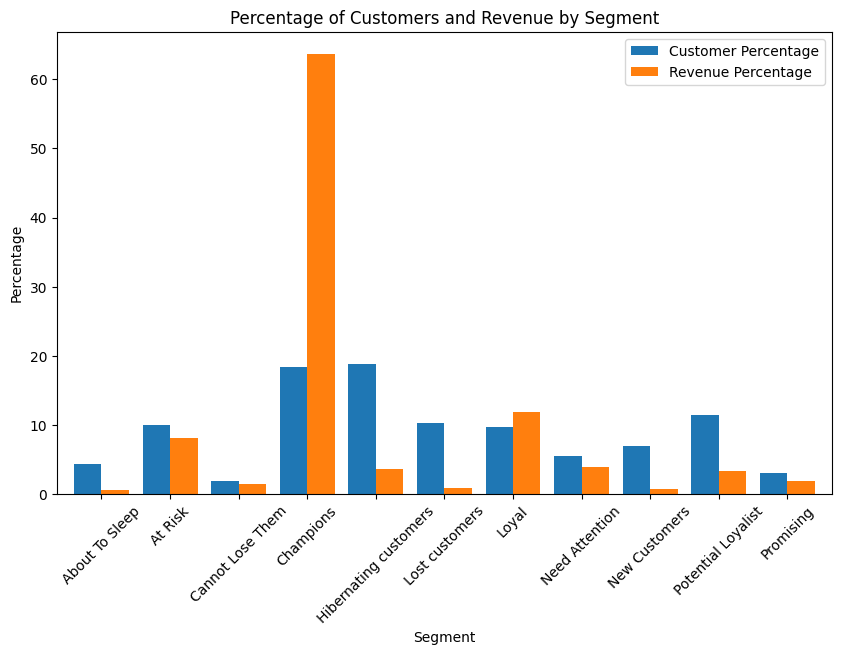

In [ ]:
# Tính phần trăm số lượng khách hàng và phần trăm tổng doanh thu của từng Segment
segment_counts = RFM_df_final['Segment'].value_counts(normalize=True) * 100
segment_revenue = RFM_df_final.groupby('Segment')['Monetary'].sum()
segment_revenue_percentage = (segment_revenue / segment_revenue.sum()) * 100

# Gộp hai dataframe
df_plot = pd.DataFrame({'Customer Percentage': segment_counts, 'Revenue Percentage': segment_revenue_percentage})

# Vẽ biểu đồ cột ghép
df_plot.plot(kind='bar', figsize=(10,6), width=0.8)
plt.title('Percentage of Customers and Revenue by Segment')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(['Customer Percentage', 'Revenue Percentage'])
plt.show()

Nhóm Hibernating customers chiếm số lượng khách hàng lớn nhất nhưng chiếm tỉ lệ doanh thu không cao nên đây là tệp tiềm năng có thể nhắm vào


**-> Thực hiện chiến dịch marketing cá nhân hóa, ưu đãi hấp dẫn và cải thiện trải nghiệm để giữ chân họ và biến họ thành khách hàng trung thành.**

Nhóm Potential Loyalist có số lượng khách hàng không nhỏ (~12%) nhưng doanh thu chưa cao, cho thấy họ có tiềm năng phát triển thành khách hàng trung thành nếu được chăm sóc đúng cách.

**-> Chính sách khuyến mãi, email marketing,... để thu hút thêm nhóm này**

<ipython-input-47-9b7cbcb8f041>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=RFM_df_final, x='Segment', y='Monetary', palette="coolwarm")


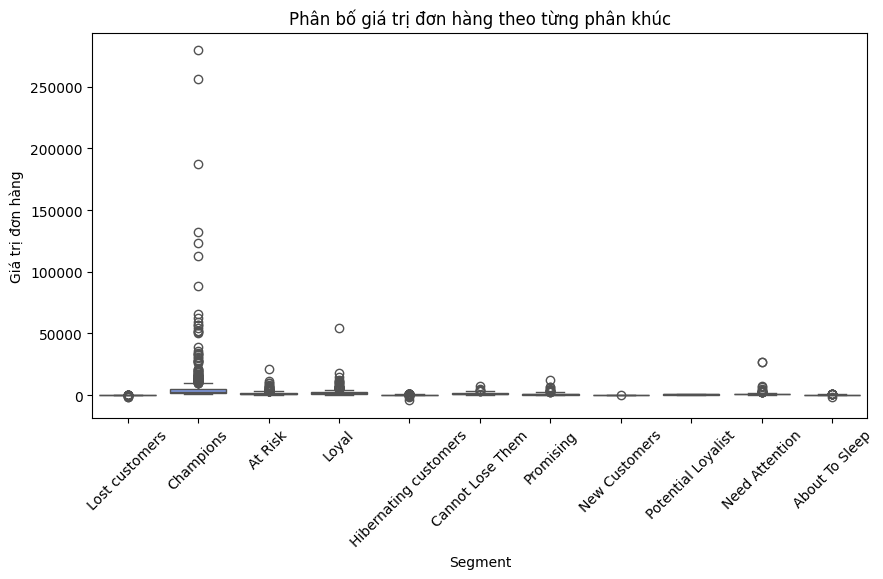

In [ ]:
#Phân bổ giá trị đơn hàng theo từng phân khúc
plt.figure(figsize=(10,5))
sns.boxplot(data=RFM_df_final, x='Segment', y='Monetary', palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Phân bố giá trị đơn hàng theo từng phân khúc")
plt.xlabel("Segment")
plt.ylabel("Giá trị đơn hàng")
plt.show()


Nhóm Champions gồm những khách hàng có giá trị cao và mua hàng nhiều lần, (Xuất hiện nhiều outliers với giá trị rất cao (~250,000))

Nhóm Loyal (Khách hàng trung thành) có phân bố giá trị đơn hàng khá ổn định.

**-> Giữ chân nhóm "Champions" và "Loyal": Chương trình khách hàng VIP, ưu đãi đặc biệt để duy trì mức chi tiêu cao, Upsell & cross-sell bằng cách giới thiệu sản phẩm bổ sung.**

Nhóm At Risk (Nguy cơ rời bỏ) có một số outliers cao, cho thấy họ từng chi tiêu lớn nhưng có thể đang giảm dần tần suất mua.

Nhóm Potential Loyalist (Khách hàng tiềm năng trung thành) có giá trị đơn hàng thấp, nhưng nếu có chiến lược chăm sóc tốt, họ có thể tăng mức chi tiêu.

**-> Tập trung vào nhóm "At Risk" và "Potential Loyalist" để chuyển đổi họ thành trung thành: Gửi email nhắc nhở, chương trình khuyến mãi dành riêng để kéo họ quay lại mua hàng, cung cấp ưu đãi giảm giá hoặc dịch vụ hậu mãi tốt hơn.**